In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


PART A

In [54]:
lab_df = pd.read_csv("Lab2_dataset.csv")
# Initialize the CountVectorizer
vectorizer = CountVectorizer()  

# Fit and transform the "text" feature
text_vectors = vectorizer.fit_transform(lab_df['text'])
text_vectors_array = text_vectors.toarray()
text_vectors_array



array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [3]:
#Splitting Data into training and testing
X_train, X_test, y_train, y_test = train_test_split(text_vectors_array, lab_df['label'], test_size=0.2, random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4136, 50447)
(1035, 50447)
(4136,)
(1035,)


In [13]:
# Initialize the SVM classifier
svm_classifier = SVC()

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)


Accuracy: 0.9652173913043478


In [12]:
##Train on Gaussian and Multi Naive Bayes Classifier

# Initialize Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Train the Gaussian Naive Bayes model on the training data
gnb_classifier.fit(X_train, y_train)

# Make predictions on the test data
gnb_y_pred = gnb_classifier.predict(X_test)

# Evaluate the Gaussian Naive Bayes model's performance
gnb_accuracy = accuracy_score(y_test, gnb_y_pred)

# Print the evaluation results for Gaussian Naive Bayes
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)

# Initialize Multinomial Naive Bayes classifier
mnb_classifier = MultinomialNB()

# Train the Multinomial Naive Bayes model on the training data
mnb_classifier.fit(X_train, y_train)

# Make predictions on the test data
mnb_y_pred = mnb_classifier.predict(X_test)

# Evaluate the Multinomial Naive Bayes model's performance
mnb_accuracy = accuracy_score(y_test, mnb_y_pred)

# Print the evaluation results for Multinomial Naive Bayes
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)

Gaussian Naive Bayes Accuracy: 0.9545893719806763
Multinomial Naive Bayes Accuracy: 0.978743961352657


From Accuracy numbers we can say that Multinomial Naive Bayes is better then SVM or Gaussian naive bayes model. One of the reason behind this may be is that Multinomial Naive Bayes model is better for text data.

PART B

In [32]:
ab_df = pd.read_csv("AB_NYC_2019.csv")
ab_df.tail()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [39]:
# Create a new column 'price_per_night'
ab_df['price_per_night'] = ab_df['price'] / ab_df['minimum_nights']


C:\Users\singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


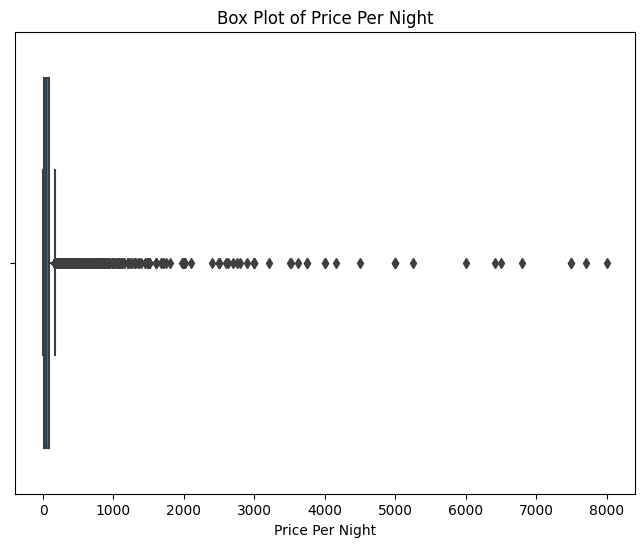

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_per_night', data=ab_df)
plt.xlabel('Price Per Night')
plt.title('Box Plot of Price Per Night')
plt.show()

From Box Plot it can be seen that there are number of outliers in the given data

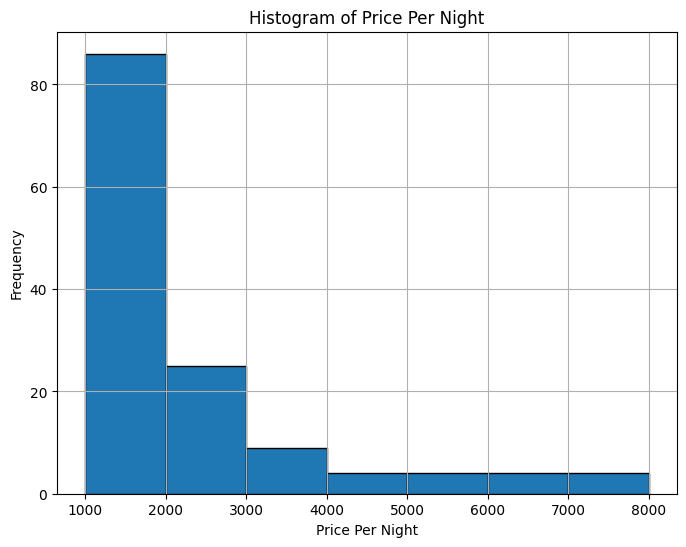

In [35]:
#Making a histogram of price per night
bins = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
plt.figure(figsize=(8, 6))
plt.hist(ab_df['price_per_night'], bins=bins, edgecolor='k')
plt.xlabel('Price Per Night')
plt.ylabel('Frequency')
plt.title('Histogram of Price Per Night')
plt.grid(True)
plt.show()

From The Histogram it is clear that the dataset follows the NORMAL distribution. Hence it explains the method of MEAN, MEDIAN, PERCENTILE Works. 

In [47]:
# Calculate the IQR for 'price_per_night'
Q1 = np.percentile(ab_df['price_per_night'], 25)
Q2 = np.percentile(ab_df['price_per_night'], 50) 
Q3 = np.percentile(ab_df['price_per_night'], 75)
IQR = Q3 - Q1

print("Interquartile Range (IQR) of Price Per Night:", IQR)
print("Median of Price Per Night:", Q2) 
print("mean of Price Per Night:", ab_df['price_per_night'].mean())
print(ab_df['price_per_night'].max())
print(ab_df['price_per_night'].min())

Interquartile Range (IQR) of Price Per Night: 54.0
Median of Price Per Night: 40.0
mean of Price Per Night: 49.181726584663394
173.33333333333334
0.0


Deviation of MAXIMUM Value, MINIMUM Value and MEDIAN is too high, this confirms the outliers

In [45]:
# Calculate the upper and lower bounds  
lower_bound = Q1 - 1.5 * IQR    
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
ab_df = ab_df[(ab_df['price_per_night'] > lower_bound) & (ab_df['price_per_night'] < upper_bound)]
ab_df.shape

(45562, 17)

C:\Users\singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='price_per_night'>

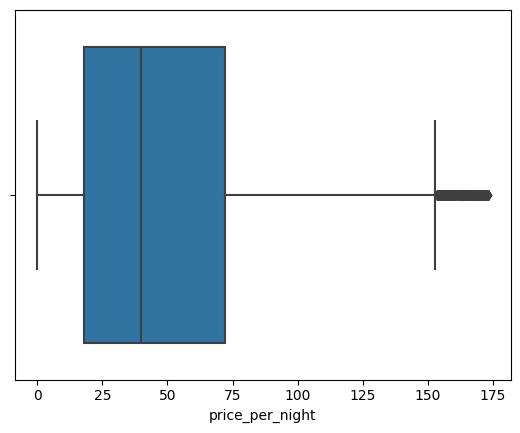

In [46]:
sns.boxplot(x='price_per_night', data=ab_df)

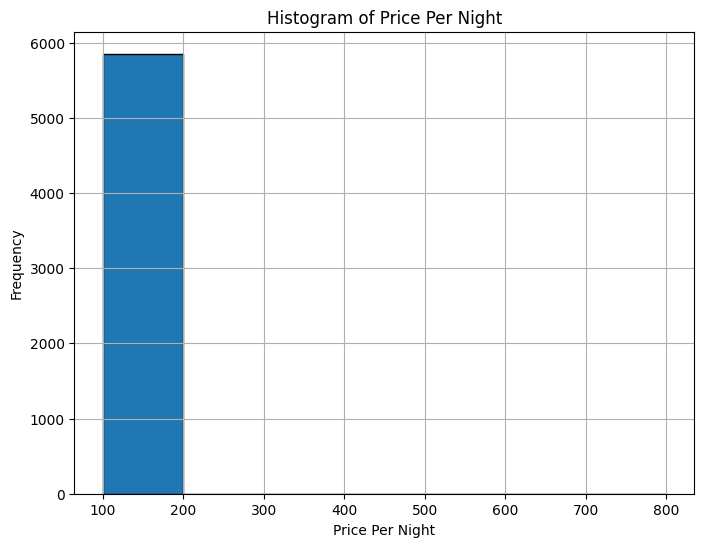

In [50]:
bins = [100, 200, 300, 400, 500, 600, 700, 800]
plt.figure(figsize=(8, 6))
plt.hist(ab_df['price_per_night'], bins=bins, edgecolor='k')
plt.xlabel('Price Per Night')
plt.ylabel('Frequency')
plt.title('Histogram of Price Per Night')
plt.grid(True)
plt.show()

NOW the Dataset Perfectly follows the normal distribution and we have a clean dataset